# LetsGrowMore Virtual Internship

## TASK4 -  Music Recomendation system

### Author :  Bhanusri Sami

In [10]:
### Importing all the necessary libraries

import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,roc_curve
import warnings
warnings.filterwarnings('ignore')


In [11]:
### Reading the necessary files .

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
songs =pd.read_csv("songs.csv")
members = pd.read_csv("members.csv", parse_dates=['registration_init_time','expiration_date'])
song_extra = pd.read_csv("song_extra_info.csv")


In [14]:
### View the shape of the files 

train_df.shape,test_df.shape,songs.shape,members.shape,song_extra.shape

((7377418, 6), (2556790, 6), (2296320, 7), (34403, 7), (2295971, 3))

In [15]:
### Since Train file is very huge , taking a sample of it 

train_df = train_df.sample(frac=0.5)

In [16]:
### Viewing the column information of the train dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 1190087 to 3112689
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 197.0+ MB


In [17]:
### Viewing the train Data .

train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
1190087,otx17vbfLuQqYcnlWwJcqrJ18onkBtr+XKCzOd75Bkc=,ycpJxb7zoNx9u5lBzrZg7RtMryI7o0WV56UnQkp19d0=,search,Artist more,top-hits-for-artist,1
5538708,TTrLQyCfVW1KeyBqEaWeNS01cnC2ZuiezhJe2Hhqytg=,1PR/lVwL4VeYcZjexwBJ2NOSTfgh8JoVxWCunnbJO/8=,listen with,Others profile more,listen-with,1
1029485,cjbsKu/eOaxG8VJBu+8F3+uDy9Q+DoQpzp4Rav20h5A=,Ot8WIXZXzvgZeZoCwcimfORgLbZJJdslmuvO1ufZB7k=,my library,Local playlist more,local-library,1
1478671,lf6xoW+L5j9bH8lQTX/lk5mS9XjxJVmP1dL/C32Hn64=,eQ/AeNQrhiCxtHyZkPbjpf2aqT2ae2KNhm8Bt1FNUx8=,my library,Local playlist more,album,1
634792,h2dEqpST7hvYJ6ZUrqz9aItELR1WgezuR8COodjYmeg=,uzU6ntNZT60j0CqFNXTpF6Oo8W3w5UwU/ANEODidW04=,discover,Online playlist more,online-playlist,0


In [18]:
### Viewing the column information of test data

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [19]:
### Viewing the  sample of test data

test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [20]:
### Viewing the song information of Songs Data .

songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [21]:
### Viewing the column information of songs dataframe .

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [22]:
### Viewing the column information of the members dataframe . 

members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  object        
 1   city                    34403 non-null  int64         
 2   bd                      34403 non-null  int64         
 3   gender                  14501 non-null  object        
 4   registered_via          34403 non-null  int64         
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.8+ MB


In [23]:
### Viewing the sample data of members dataframe .

members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [24]:
### Viewing the column information of songs_extra dataframe .

song_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [25]:
### Viewing the data of the songs_extra dataframe 

song_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [26]:
### Merging the train_df  with other dataframes

train_df = train_df.merge(songs,how='left',on='song_id')
train_df = train_df.merge(members,how='left',on='msno')
train_df = train_df.merge(song_extra, on='song_id', how='left')

In [27]:
#### Merging the test_df with other information 

test_df = test_df.merge(songs,how='left',on='song_id')
test_df = test_df.merge(members,how='left',on='msno')
test_df = test_df.merge(song_extra, on='song_id', how='left')

In [28]:
#### Viewing the shape of train and test after merge .


train_df.shape,test_df.shape

((3688709, 20), (2556790, 20))

In [29]:
### deleting the unnessary dataframes .

del songs,members,song_extra

In [30]:
# Splitting the date field into year,month and day  from train dataframe  .

train_df['registration_year'] = train_df['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
train_df['registration_month'] = train_df['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
train_df['registration_day'] = train_df['registration_init_time'].apply(lambda x:int(str(x)[8:10]))


train_df['expiration_year'] = train_df['expiration_date'].apply(lambda x:int(str(x)[0:4]))
train_df['expiration_month'] = train_df['expiration_date'].apply(lambda x:int(str(x)[5:7]))
train_df['expiration_day'] = train_df['expiration_date'].apply(lambda x:int(str(x)[8:10]))

In [31]:
# Splitting the date field into year,month and day from test dataframe . 

test_df['registration_year'] = test_df['registration_init_time'].apply(lambda x:int(str(x)[0:4]))
test_df['registration_month'] = test_df['registration_init_time'].apply(lambda x:int(str(x)[5:7]))
test_df['registration_day'] = test_df['registration_init_time'].apply(lambda x:int(str(x)[8:10]))

test_df['expiration_year'] = test_df['expiration_date'].apply(lambda x:int(str(x)[0:4]))
test_df['expiration_month'] = test_df['expiration_date'].apply(lambda x:int(str(x)[5:7]))
test_df['expiration_day'] = test_df['expiration_date'].apply(lambda x:int(str(x)[8:10]))

In [32]:
### Defining a function and extracting year from isrc from both train and test .


def isrc_to_year(isrc):
    if type(isrc)==str:
        if int(isrc[5:7])>17:
            return 1900+int(isrc[5:7])
        else:
            return 2000+int(isrc[5:7])
    else:
        return np.nan
    
train_df['song_year']=train_df['isrc'].apply(isrc_to_year)
test_df['song_year']=test_df['isrc'].apply(isrc_to_year)

In [33]:
### Deleting unecessary columns from both train and test dataframes .

train_df=train_df.drop(['registration_init_time','expiration_date','name','isrc'], axis=1)##
test_df=test_df.drop(['registration_init_time','expiration_date','name','isrc','id'], axis=1)

In [34]:
### Viewing the columns information after modification .

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   msno                object 
 1   song_id             object 
 2   source_system_tab   object 
 3   source_screen_name  object 
 4   source_type         object 
 5   target              int64  
 6   song_length         float64
 7   genre_ids           object 
 8   artist_name         object 
 9   composer            object 
 10  lyricist            object 
 11  language            float64
 12  city                int64  
 13  bd                  int64  
 14  gender              object 
 15  registered_via      int64  
 16  registration_year   int64  
 17  registration_month  int64  
 18  registration_day    int64  
 19  expiration_year     int64  
 20  expiration_month    int64  
 21  expiration_day      int64  
 22  song_year           float64
dtypes: float64(3), int64(10), object(10)
memory usage: 675.4+

In [35]:
#### Detecting the Null Values and vizualising the count of them .


dtypes = pd.DataFrame(train_df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=train_df.nunique().sort_values(ascending=True)

dtypes["Null Values"]=train_df.isnull().sum()

dtypes["% null Values"]=train_df.isnull().sum()/len(train_df)



dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,27533,1589255,0.430843
gender,object,2,1480979,0.401490
composer,object,59415,836720,0.226833
song_year,float64,99,288876,0.078314
source_screen_name,object,20,207645,0.056292
genre_ids,object,534,59145,0.016034
source_system_tab,object,8,12421,0.003367
source_type,object,12,10823,0.002934
language,float64,10,79,0.000021
artist_name,object,32224,55,0.000015


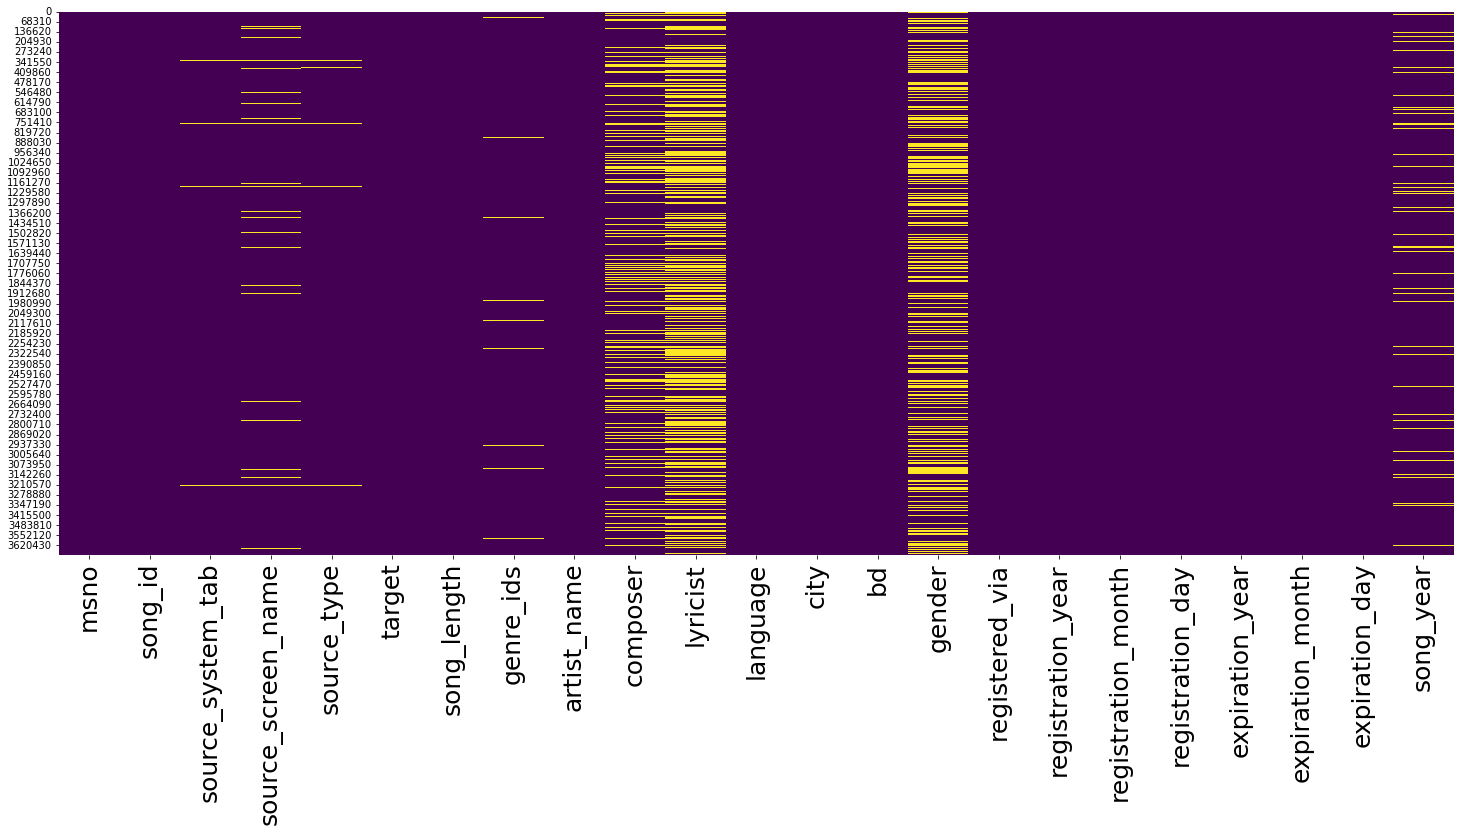

In [36]:
### Viewing the null values in the form of a heatmap


plt.figure(figsize=(25,10))

sns.heatmap(train_df.isnull(),cbar=False,cmap='viridis')
plt.tick_params(axis='x', labelsize=25)

Text(0.5, 1.0, 'Target Distribution')

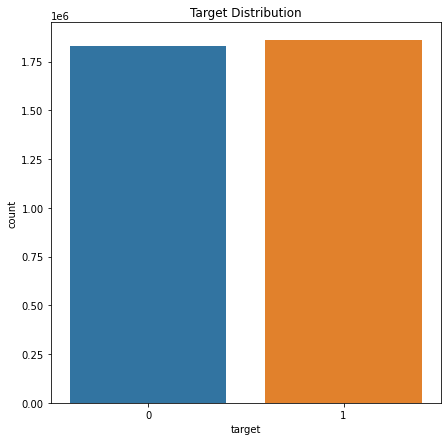

In [37]:
### Visualing the balance of the target variable .

plt.figure(figsize=(7,7))


ax = sns.countplot(x='target',data=train_df)
ax.set_title('Target Distribution')

In [38]:
## Replaicng the null values appropriately from train .


## String Null 'Unknown'
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = train_df[col].fillna(value = "unknown")
    
# Numerics Null mean    
for col in train_df.select_dtypes(exclude=['object']).columns:
    train_df[col] = train_df[col].fillna(value = train_df[col].mean())
    


In [39]:
## Replacing the null values appropriately from test .

# String Nul 'Unknown'
for col in test_df.select_dtypes(include=['object']).columns:
    test_df[col] = test_df[col].fillna(value = "unknown")
    
# Numerics Null mean    
for col in test_df.select_dtypes(exclude=['object']).columns:
    test_df[col] = test_df[col].fillna(value = test_df[col].mean())

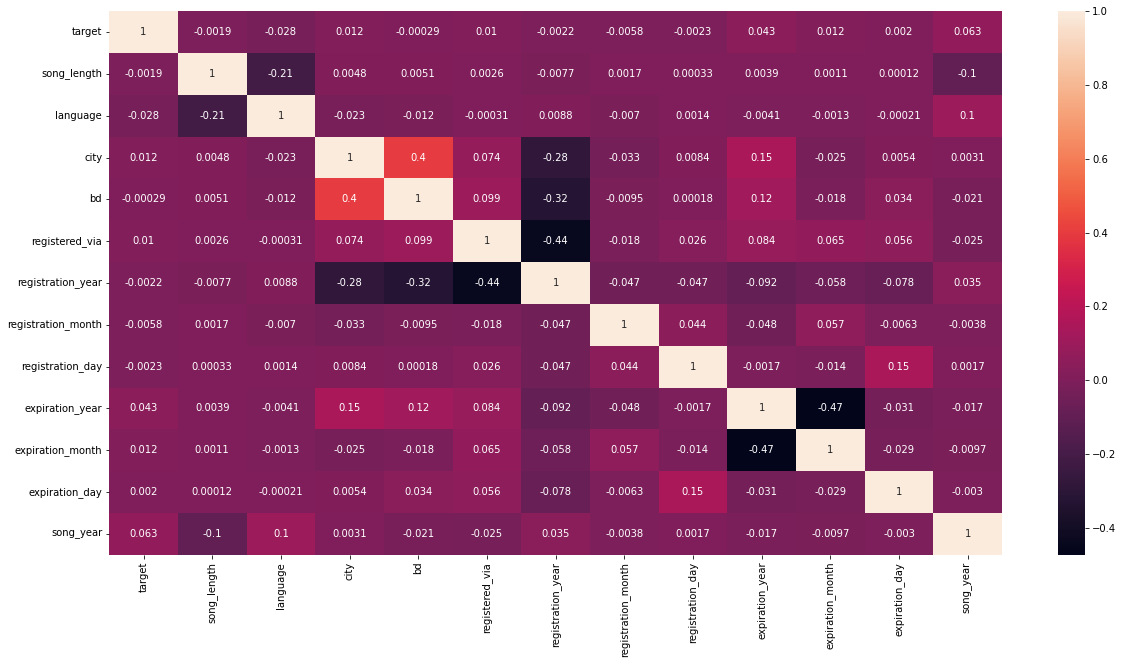

In [40]:
###  Viewing the Сorrelation among the variables in form of co-relation Matrix .

plt.figure(figsize=[20,10])
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [41]:
### treating the outliers of bd variable .

train_df['bd'] = train_df['bd'].apply(lambda x : 0 if x > 100 else abs(x))
test_df['bd'] = test_df['bd'].apply(lambda x : 0 if x > 100 else abs(x))

<Axes: >

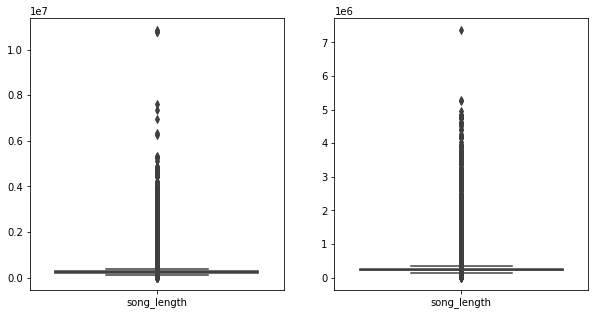

In [42]:
### Checking for outliers .

cols = train_df.select_dtypes(exclude=['object']).columns
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=train_df[['song_length']])
plt.subplot(1,2,2)
sns.boxplot(data=test_df[['song_length']])

In [43]:
### Defining a function that returns a lower and upper bounds . 

def cal_bounds(listbound):
    q1, q3= np.percentile(listbound,[25,75])
    iqr = q3 - q1
    upper = q3+(1.5 * iqr)
    lower = q1-(1.5*iqr)
   ## print(lower,upper)
    return lower,upper 

In [44]:
### Replacing the outliers with inner bound and outer bound

lower,upper = cal_bounds(train_df['song_length'])
print(lower,upper)

train_df.loc[train_df['song_length']>upper,'song_length'] = upper
train_df.loc[train_df['song_length']<lower,'song_length'] = lower

lower,upper = cal_bounds(test_df['song_length'])
print(lower,upper)

test_df.loc[test_df['song_length']>upper,'song_length'] = upper
test_df.loc[test_df['song_length']<lower,'song_length'] = lower


128575.0 358311.0
127501.5 356169.5


<Axes: >

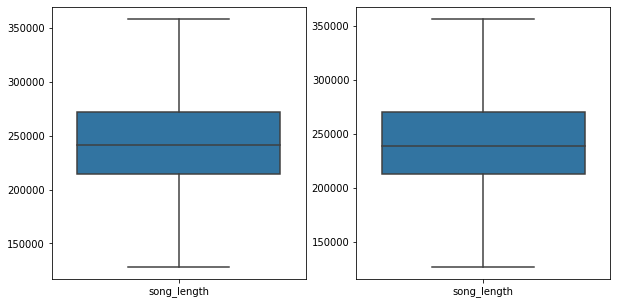

In [45]:
### Viewing the columns data after fixing the outliers .

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=train_df[['song_length']])
plt.subplot(1,2,2)
sns.boxplot(data=test_df[['song_length']])

In [46]:
#### Label Encoding all the categorical columns of both train and test dataset . 

label_encoder = LabelEncoder()
for i in train_df.columns:
    if train_df[i].dtype == 'object':
        train_df[i] = label_encoder.fit_transform(train_df[i])
    
for i in test_df.columns:
    if test_df[i].dtype == 'object':
        test_df[i] = label_encoder.fit_transform(test_df[i])

In [47]:
### Splitting the data into features and target and furthur into train and validation Data .

Y_target = train_df['target']
X_features =  train_df.drop(['target'], axis = 1)
X_train, X_val, Y_train, Y_val = train_test_split(X_features , Y_target, random_state=10,test_size=0.2)

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(2950967, 22)
(737742, 22)
(2950967,)
(737742,)


In [48]:
### Normalizing the data using Standard Scalar .

SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_val   = SS.fit_transform(X_val)

In [49]:
# Model with the best estimator

RF = RandomForestClassifier(n_estimators = 100,verbose=3,n_jobs=-1,max_depth=2)
RF.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100

building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100building tree 23 of 100

building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.4s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100building tree 35 of 100

building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestClassifier(max_depth=2, n_jobs=-1, verbose=3)

In [50]:
### Accuracy_score on Train data .

RF_TrainScore = RF.score(X_train, Y_train)
print("Accutracy Score for Train Data : ",RF_TrainScore)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    7.4s finished


Accutracy Score for Train Data :  0.609682182145717


In [51]:
### Predicting the target variable for Validation Data. 

Y_pred= RF.predict(X_val)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.8s finished


In [52]:
### Accuracy Score for Validation Data .

print("Accuracy Score for Validation Data : ",RF.score(X_val, Y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.0s finished


Accuracy Score for Validation Data :  1.0


In [53]:
###  Predicitng the target variable for Test Data .

Y_test_pred = RF.predict(test_df)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    6.0s finished


In [54]:
### Accuracy Score for Test Data . 

print("Accuracy Score for Test Data",RF.score(test_df,Y_test_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    5.8s finished


Accuracy Score for Test Data 1.0


In [55]:
### Classification Report

print(classification_report(Y_pred, Y_val))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60    356245
           1       0.63      0.61      0.62    381497

    accuracy                           0.61    737742
   macro avg       0.61      0.61      0.61    737742
weighted avg       0.61      0.61      0.61    737742



In [56]:
### Confusion Matrix 

cm = confusion_matrix(Y_pred, Y_val)
print(cm)

[[217557 138688]
 [148484 233013]]


In [59]:
### Accuracy Score 

auc=accuracy_score(Y_pred, Y_val)

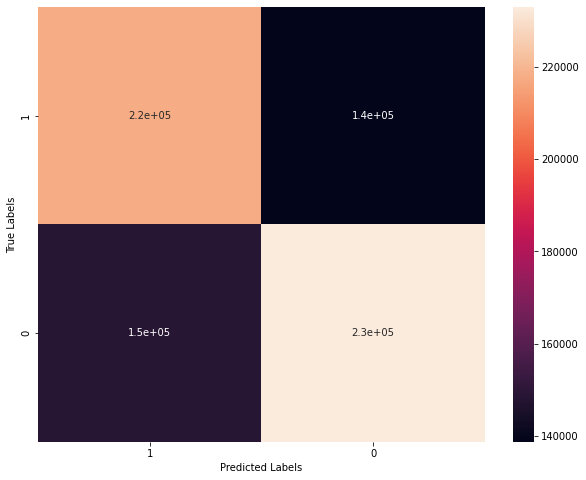

In [57]:
### Visualizing the confusion Matrix using Heat Map

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, xticklabels = Y_val.unique(), yticklabels = Y_val.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Text(0.95, 0.05, 'AUC = 0.6107')

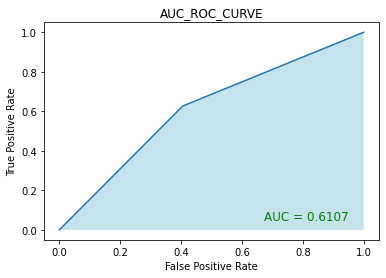

In [60]:
#### Visualizing the AUC_ROC Curve . 

plt.title("AUC_ROC_CURVE")
fpr, tpr, thresholds = roc_curve(Y_val, Y_pred)
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, color='green')